<a href="https://colab.research.google.com/github/riyashah29/MlExps/blob/main/Experiment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Riya Shah    
Roll No.: D085  
SAP ID: 60009230017  
Branch: CSE DS-2-1

MINI PROJECT - PREDICTING WHETHER CUSTOMER WILL DEFAULT ON CREDIT CARD PAYMENT NEXT MONTH

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/credit_card_default.csv")

column variable info / data card


X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2.0,2,1,24.0,2,2,-1,-1,...,0,0,0,0.0,689,0,0,0,0,1
1,2,120000,2.0,2,2,26.0,-1,2,0,0,...,3272,3455,3261,0.0,1000,1000,1000,0,2000,1
2,3,90000,2.0,2,2,34.0,0,0,0,0,...,14331,14948,15549,1518.0,1500,1000,1000,1000,5000,0
3,4,50000,2.0,2,1,37.0,0,0,0,0,...,28314,28959,29547,2000.0,2019,1200,1100,1069,1000,0
4,5,50000,1.0,2,1,57.0,-1,0,-1,0,...,20940,19146,19131,2000.0,36681,10000,9000,689,679,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1.0,3,1,39.0,0,0,0,0,...,88004,31237,15980,8500.0,20000,5003,3047,5000,1000,0
29996,29997,150000,1.0,3,2,43.0,-1,-1,-1,-1,...,8979,5190,0,1837.0,3526,8998,129,0,0,0
29997,29998,30000,1.0,2,2,37.0,4,3,2,-1,...,20878,20582,19357,0.0,0,22000,4200,2000,3100,1
29998,29999,80000,1.0,3,1,41.0,1,-1,0,0,...,52774,11855,48944,85900.0,3409,1178,1926,52964,1804,1
29999,30000,50000,1.0,2,1,46.0,0,0,0,0,...,36535,32428,15313,2078.0,1800,1430,1000,1000,1000,1


In [ ]:
df.drop(columns=['ID'], inplace=True, errors='ignore')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2.0,2,1,24.0,2,2,-1,-1,-2,...,0,0,0,0.0,689,0,0,0,0,1
1,120000,2.0,2,2,26.0,-1,2,0,0,0,...,3272,3455,3261,0.0,1000,1000,1000,0,2000,1
2,90000,2.0,2,2,34.0,0,0,0,0,0,...,14331,14948,15549,1518.0,1500,1000,1000,1000,5000,0
3,50000,2.0,2,1,37.0,0,0,0,0,0,...,28314,28959,29547,2000.0,2019,1200,1100,1069,1000,0
4,50000,1.0,2,1,57.0,-1,0,-1,0,0,...,20940,19146,19131,2000.0,36681,10000,9000,689,679,0


#EDA AND PREPROCESSING

In [ ]:
print(df.isnull().sum())

LIMIT_BAL                       0
SEX                             5
EDUCATION                       0
MARRIAGE                        0
AGE                           100
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                      132
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(35)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29728 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29728 non-null  int64  
 1   SEX                         29728 non-null  float64
 2   EDUCATION                   29728 non-null  int64  
 3   MARRIAGE                    29728 non-null  int64  
 4   AGE                         29728 non-null  float64
 5   PAY_0                       29728 non-null  int64  
 6   PAY_2                       29728 non-null  int64  
 7   PAY_3                       29728 non-null  int64  
 8   PAY_4                       29728 non-null  int64  
 9   PAY_5                       29728 non-null  int64  
 10  PAY_6                       29728 non-null  int64  
 11  BILL_AMT1                   29728 non-null  int64  
 12  BILL_AMT2                   29728 non-null  int64  
 13  BILL_AMT3                   29728 no

In [ ]:
print(df.describe())

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    29728.000000  29728.000000  29728.000000  29728.000000  29728.000000   
mean    167420.266416      1.603606      1.853841      1.551837     35.490548   
std     129767.752049      0.489156      0.790709      0.522000      9.219658   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  29728.000000  29728.000000  29728.000000  29728.000000  29728.000000   
mean      -0.016786     -0.131290     -0.164088     -0.218615     -0.263624   
std        1.121667      1.195249

In [ ]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE']:
    print(f"\n{col} unique values: {df[col].unique()}")


SEX unique values: [2. 1.]

EDUCATION unique values: [2 1 3 5 4 6 0]

MARRIAGE unique values: [1 2 3 0]


as mentioned in the data card marriage has only 3 attributes and education has only 4 so removing extra data

In [ ]:
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

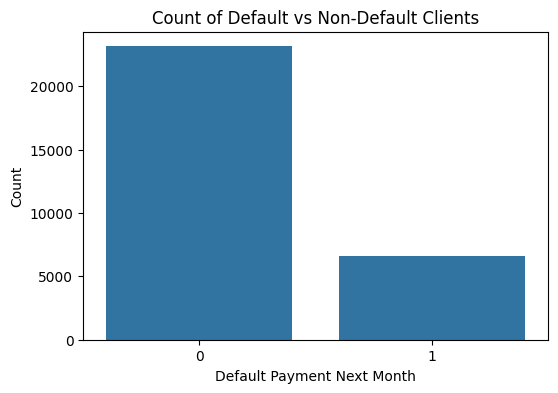

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="default payment next month", data=df)
plt.title("Count of Default vs Non-Default Clients")
plt.xlabel("Default Payment Next Month")
plt.ylabel("Count")
plt.show()

this shows major class imbalance

In [ ]:
print(df['default payment next month'].value_counts())

default payment next month
0    23153
1     6575
Name: count, dtype: int64


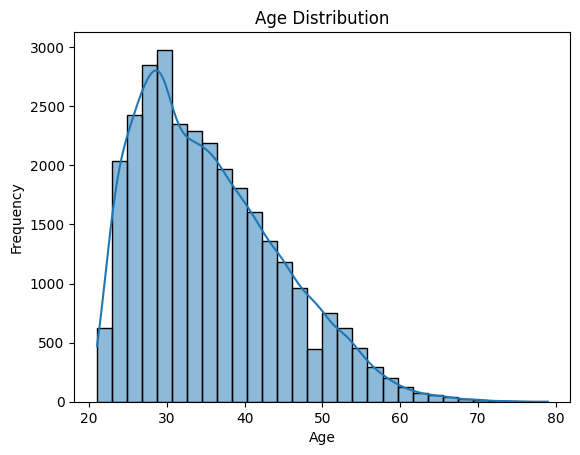

In [ ]:
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

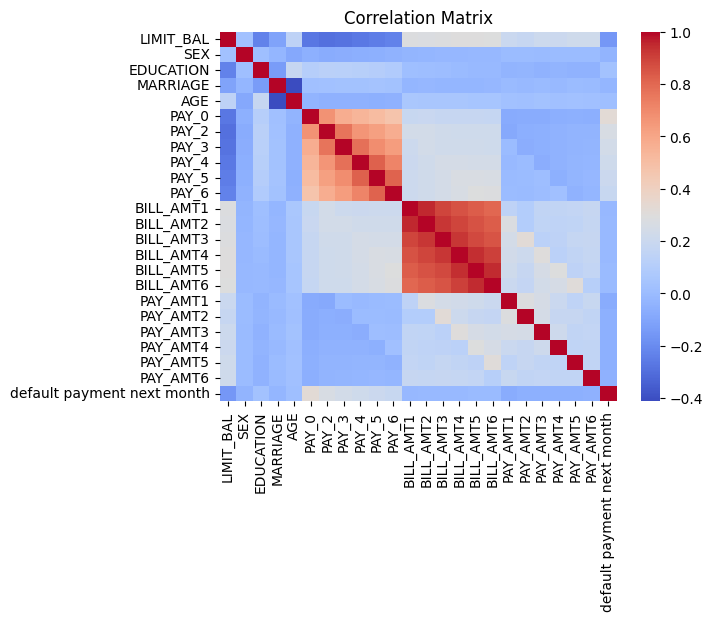

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

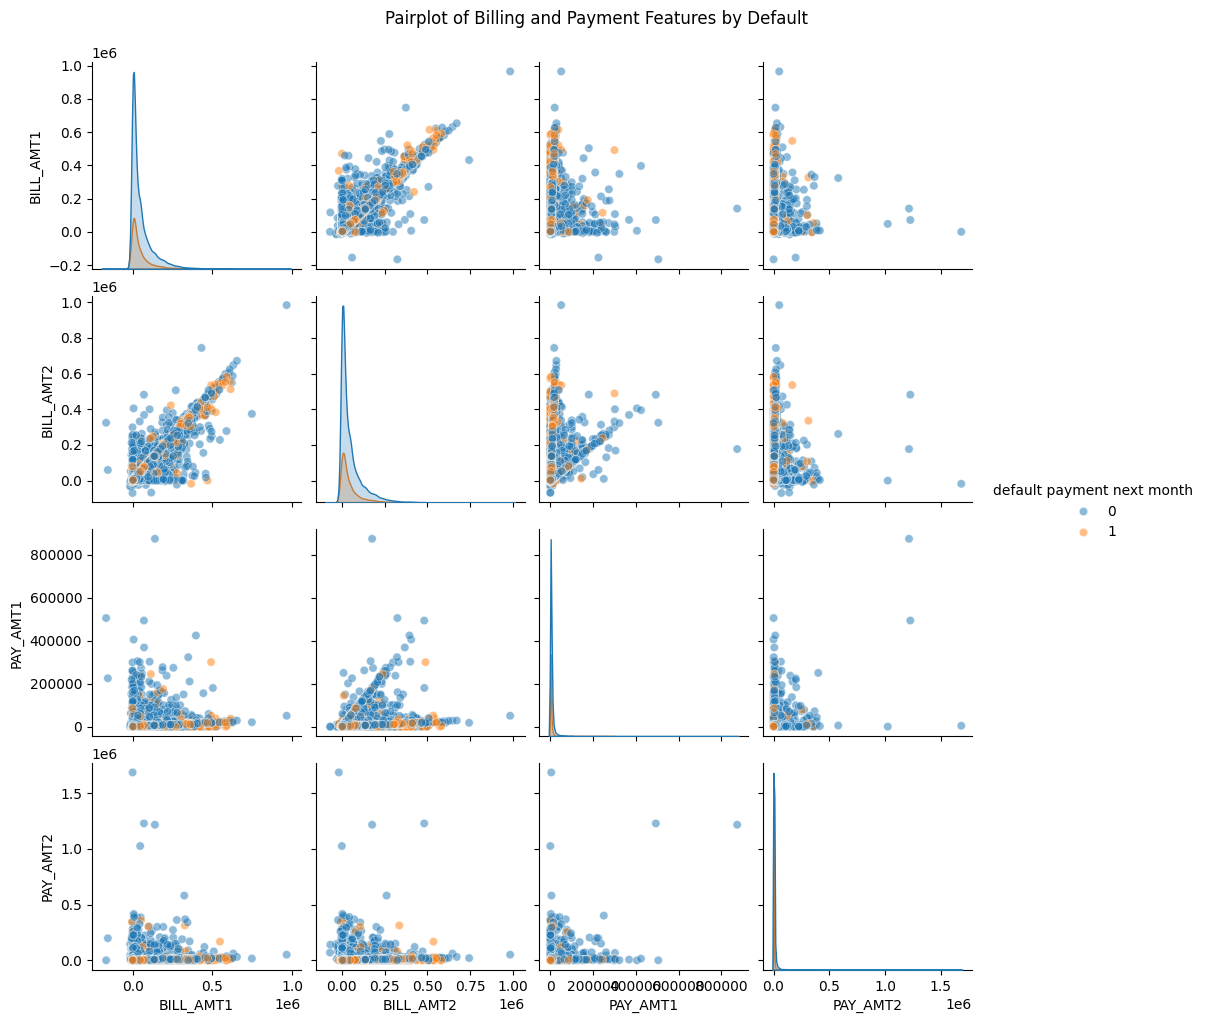

In [ ]:
sns.pairplot(df, vars=["BILL_AMT1", "BILL_AMT2", "PAY_AMT1", "PAY_AMT2"], hue="default payment next month", plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Billing and Payment Features by Default", y=1.02)
plt.show()

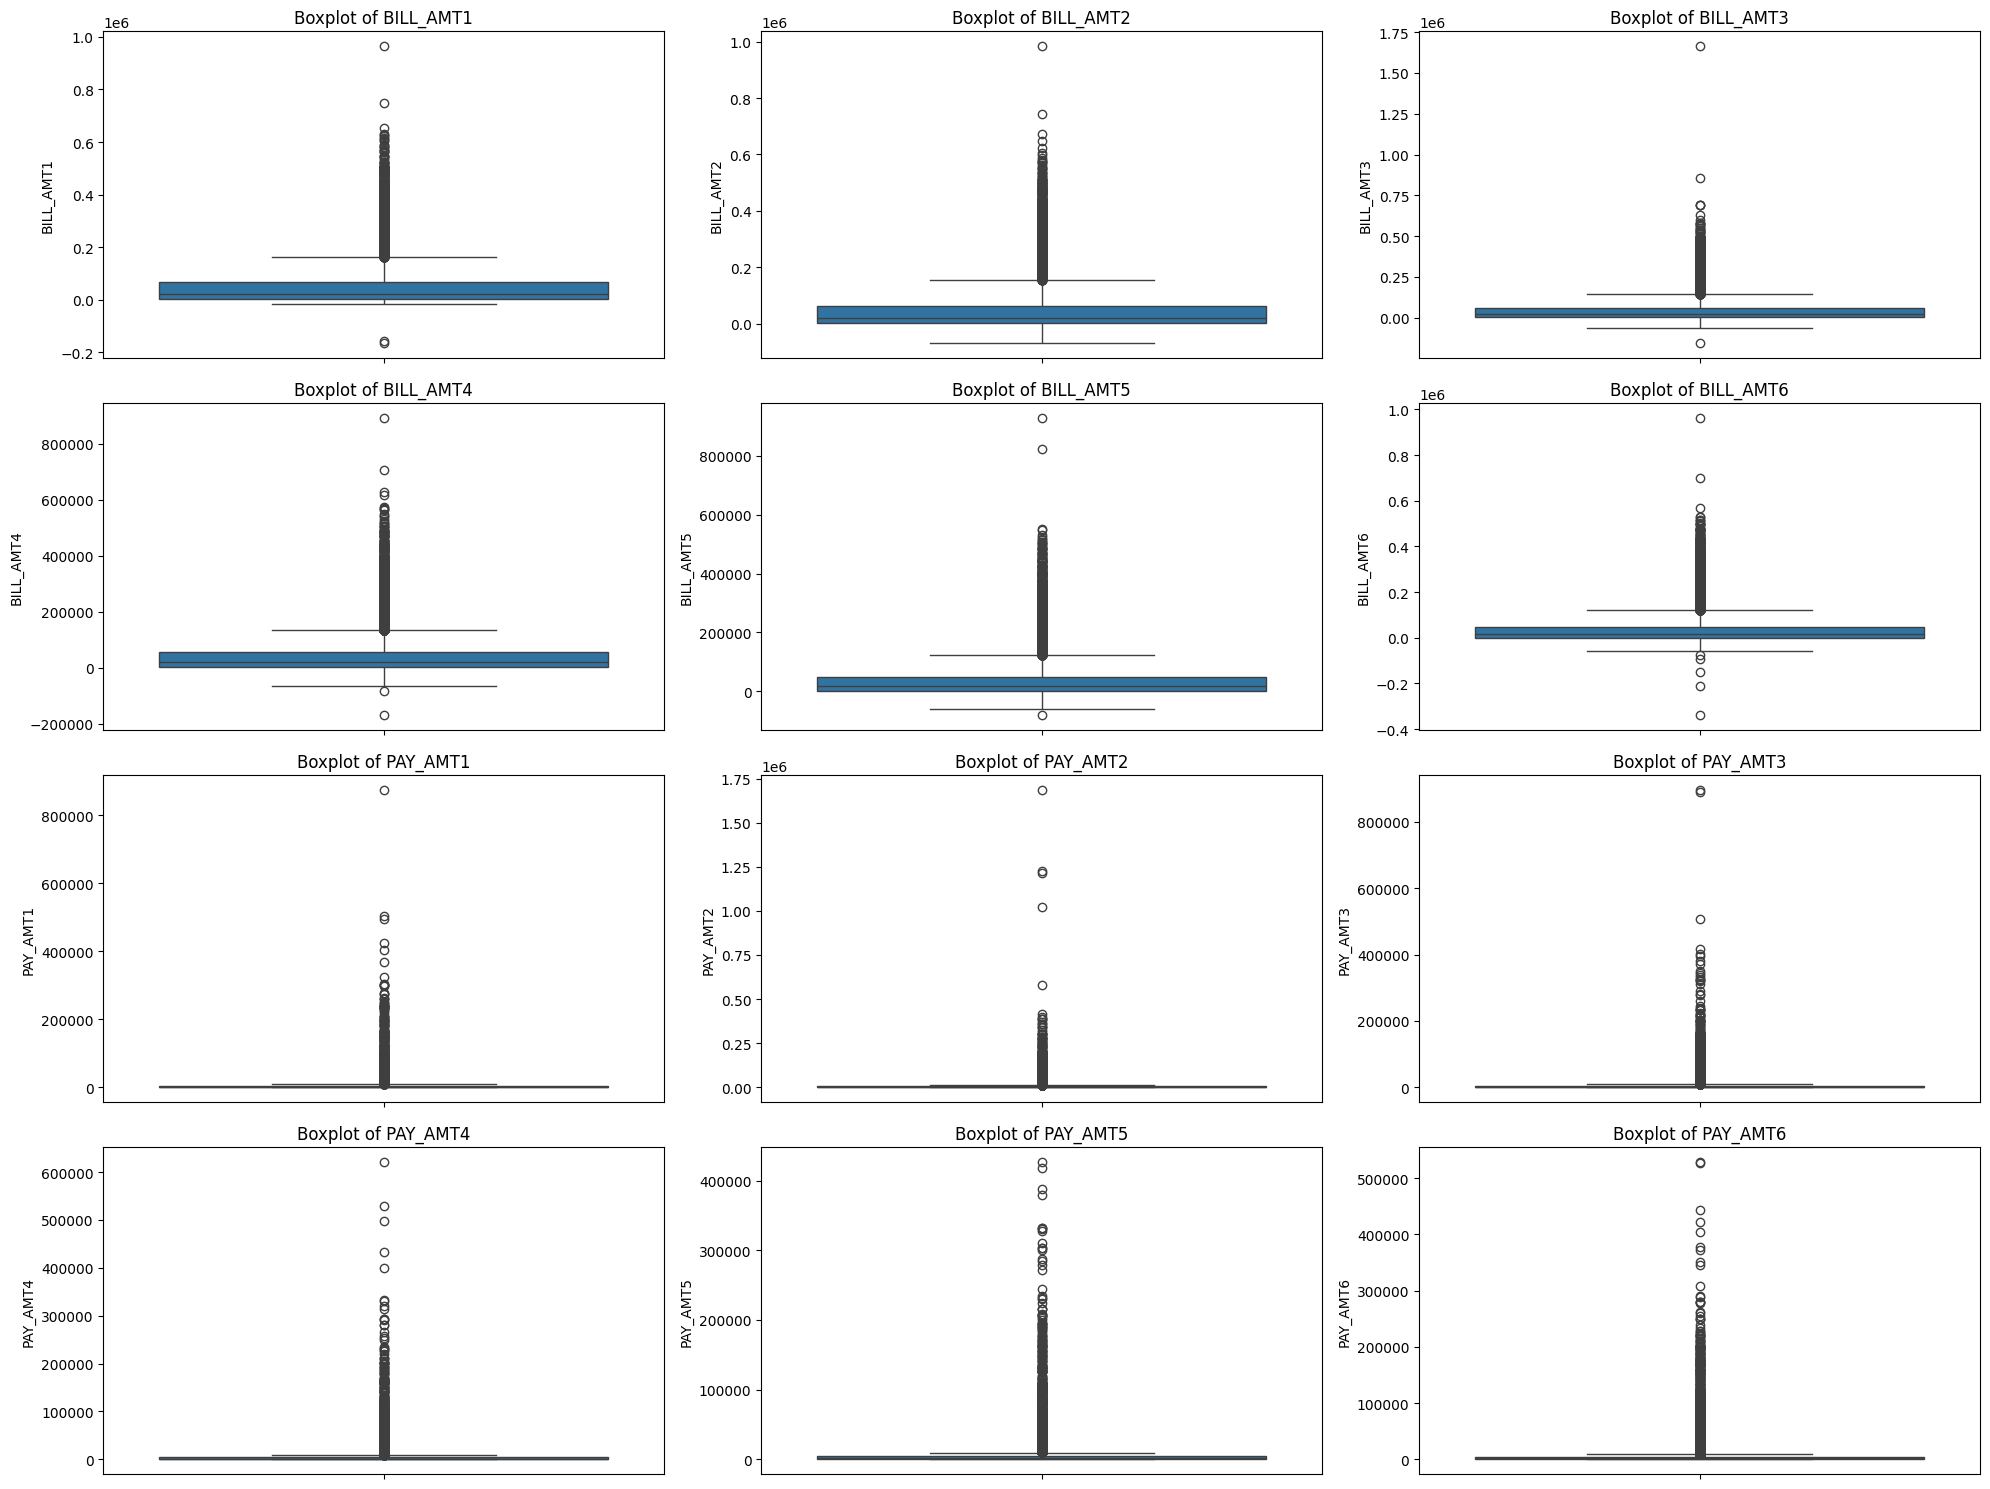

In [ ]:
pay_bill_cols = [col for col in df.columns if "PAY_AMT" in col or "BILL_AMT" in col]
plt.figure(figsize=(20, 15))
for i, col in enumerate(pay_bill_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(29728, 24)

In [ ]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df_cleaned = remove_outliers_iqr(df, pay_bill_cols)
print(df_cleaned.shape)

(14520, 24)


In [ ]:
print(df_cleaned['default payment next month'].value_counts())

default payment next month
0    10465
1     4055
Name: count, dtype: int64


In [ ]:
nodefault = df_cleaned[df_cleaned['default payment next month'] == 0]
yesdefault = df_cleaned[df_cleaned['default payment next month'] == 1]

majority_sampled = nodefault.sample(n=len(yesdefault), random_state=42)

df2 = pd.concat([majority_sampled, yesdefault])

In [ ]:
print(df2['default payment next month'].value_counts())

default payment next month
0    4055
1    4055
Name: count, dtype: int64


#fit ML model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
x= df2.drop(columns=["default payment next month"])
y= df2["default payment next month"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

testing 3 differenct models to determine best fit

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
svm = SVC(probability=True)

In [ ]:
log_reg.fit(x_train_scaled, y_train)
y_pred_log = log_reg.predict(x_test_scaled)
y_prob_log = log_reg.predict_proba(x_test_scaled)[:, 1]

In [ ]:
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)
y_prob_rf = rf.predict_proba(x_test_scaled)[:, 1]

In [ ]:
svm.fit(x_train_scaled, y_train)
y_pred_svm = svm.predict(x_test_scaled)
y_prob_svm = svm.predict_proba(x_test_scaled)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc,classification_report

In [ ]:
#logistic reg
acc_log = accuracy_score(y_test, y_pred_log)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = auc(fpr_log, tpr_log)
print(acc_log)
print(auc_log)

0.6785861076859844
0.7288537899306402


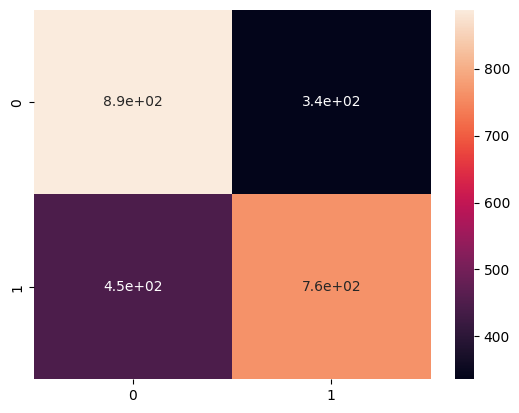

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log),annot=True)
plt.show()

In [ ]:
report1=classification_report(y_test, y_pred_log)
print(report1)

              precision    recall  f1-score   support

           0       0.67      0.73      0.69      1224
           1       0.69      0.63      0.66      1209

    accuracy                           0.68      2433
   macro avg       0.68      0.68      0.68      2433
weighted avg       0.68      0.68      0.68      2433



In [ ]:
#rf
acc_rf = accuracy_score(y_test, y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
print(acc_rf)
print(auc_rf)

0.6859843814221126
0.7451608848667671


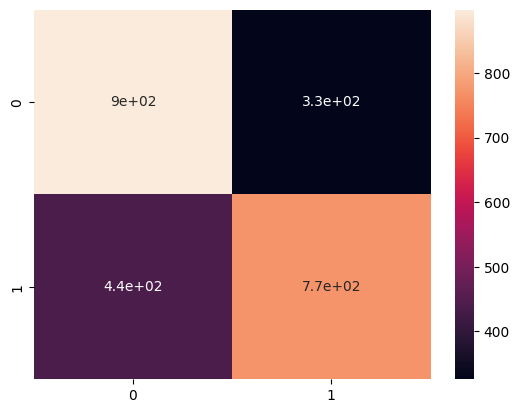

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot=True)
plt.show()

In [ ]:
report2=classification_report(y_test, y_pred_rf)
print(report2)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1224
           1       0.70      0.64      0.67      1209

    accuracy                           0.69      2433
   macro avg       0.69      0.69      0.69      2433
weighted avg       0.69      0.69      0.69      2433



In [ ]:
#svm
acc_svm = accuracy_score(y_test, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)
print(acc_svm)
print(auc_svm)

0.7003699136868065
0.7499324240310958


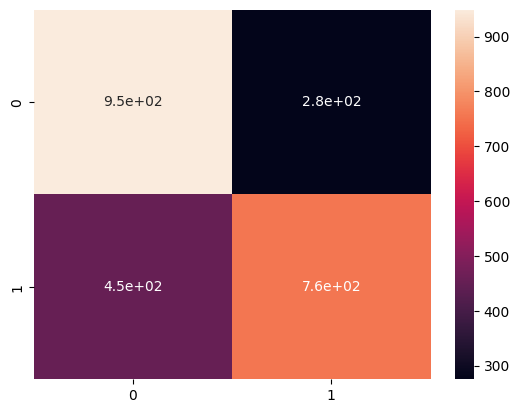

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm),annot=True)
plt.show()

In [ ]:
report3=classification_report(y_test, y_pred_svm)
print(report3)

              precision    recall  f1-score   support

           0       0.68      0.78      0.72      1224
           1       0.73      0.62      0.67      1209

    accuracy                           0.70      2433
   macro avg       0.70      0.70      0.70      2433
weighted avg       0.70      0.70      0.70      2433



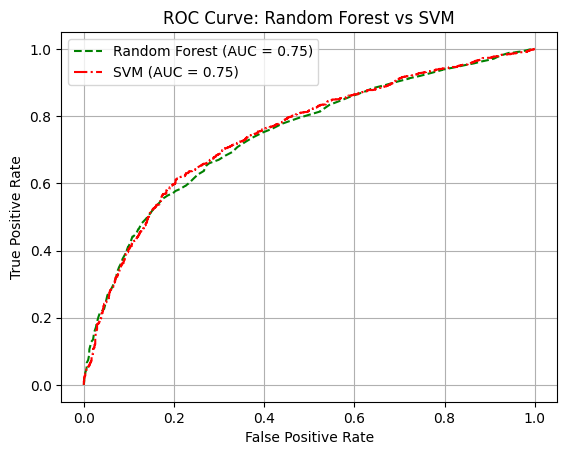

In [ ]:
# Rf
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle='--', color='green')
# svm
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})", linestyle='-.', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Random Forest vs SVM")
plt.legend()
plt.grid(True)
plt.show()

AUC is same (svm is a bit more) and accuracy of svm is also a little bit more so we select svm as final model and perform gridsearchcv to find best parameters for the same

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
grid_predictions = grid_search.predict(x_test)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
final_model = grid_search.best_estimator_
final_model.fit(x_train_scaled, y_train)
y_pred_final = final_model.predict(x_test_scaled)

In [ ]:
acc_log = accuracy_score(y_test, y_pred_final)
print(acc_log)
print("Classification Report:")
print(classification_report(y_test, y_pred_final))

0.7003699136868065
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.72      1224
           1       0.73      0.62      0.67      1209

    accuracy                           0.70      2433
   macro avg       0.70      0.70      0.70      2433
weighted avg       0.70      0.70      0.70      2433

